In [91]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import panel as pn
import re
from bokeh.plotting import figure, show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
pn.extension(comms='vscode')

In [2]:
assets_df = pd.read_csv('data/jordans_asset_dataset_2023_03_06.csv')
assets_full_df = assets_df.copy()
assets_df.head()

,asset.cost_center,asset.u_asset_id,assigned_to,assigned_to.active,assigned_to.cost_center,assigned_to.department,assigned_to.employee_number,assigned_to.manager,BioAccess.bioFire Email Address,assigned_to.u_company_code,...,Sophos.OS,Sophos.Protection,Sophos.Tamper protection,support_group,u_ci,u_status,u_sub_status,warranty_expiration,sys_created_on,sys_created_on.1
0,2860747,AST0108027,MECHAM Jonathan,True,2860747,Software Development,16012062,MCCARTY Jameson,jonathan.mecham@biofiredx.com,028 - BioFire Diagnostics LLC,...,Windows 10 Enterprise,Intercept X Advanced with XDR,On,BMX-Deskside_SLC_L2,True,Deployed,Functional,2024-12-03 00:00:00,2022-12-09 00:00:00,2022-12-09 00:00:00
1,2858030,AST0109801,ALLEN Jared,True,2858030,BFDX IS Internal Business Software,10019166,DAVISON Kirby,Jared.Allen@biofiredx.com,028 - BioFire Diagnostics LLC,...,Windows 10 Enterprise,Intercept X Advanced with XDR,On,BMX-Deskside_SLC_L2,True,Deployed,Functional,2023-11-06 00:00:00,2022-12-09 00:00:00,2022-12-09 00:00:00
2,2860705,AST0115321,BHATIA Ajay,True,2860705,Regulatory Affairs,10018360,BOURZAC Kevin,Ajay.Bhatia@biofiredx.com,028 - BioFire Diagnostics LLC,...,Windows 10 Enterprise,Intercept X Advanced with XDR,On,BMX-Deskside_SLC_L2,True,Deployed,Functional,2025-08-16 00:00:00,2022-12-21 00:00:00,2022-12-21 00:00:00
3,2121010,AST0115322,CLARKE Kimon,True,2121010,US CLNMKT Hospital-Based Clinician,10022276,SHAFFER Matt,Kimon.Clarke@biofiredx.com,021 - bioMérieux Inc.,...,Windows 10 Enterprise,Intercept X Advanced with XDR,Off,BMX-Deskside_SLC_L2,True,Deployed,Functional,2025-08-17 00:00:00,2022-12-22 00:00:00,2022-12-22 00:00:00
4,2804740,AST0115323,SMITH Jennifer,True,2804740,Manufacturing QA Measurement Systems,10021946,BALMANNO Sam,Jennifer.Smith@biofiredx.com,028 - BioFire Diagnostics LLC,...,Windows 10 Enterprise,Intercept X Advanced with XDR,On,BMX-Deskside_SLC_L2,True,Deployed,Functional,2025-08-17 00:00:00,2022-12-22 00:00:00,2022-12-22 00:00:00


In [3]:
for col in assets_df.columns:
    print (col)

asset.cost_center
asset.u_asset_id
assigned_to
assigned_to.active
assigned_to.cost_center
assigned_to.department
assigned_to.employee_number
assigned_to.manager
BioAccess.bioFire Email Address
assigned_to.u_company_code
BioAccess.Display Name
BioAccess.Email
BioAccess.Employee ID
BioAccess.Employee Status
BioAccess.Username
category
Computer Name
BioAccess.Sunset Date
Intune.Azure AD Device ID
Intune.Azure AD registered
Intune.Category
Intune.CellularTechnology
Intune.Compliance
Intune.Computer Name
Intune.Device ID
Intune.Device state
Intune.EAS activated
Intune.EAS activation ID
Intune.EAS reason
Intune.EAS status
Intune.EID
Intune.Encrypted
Intune.Enrollment date
Intune.EthernetMAC
Intune.Free storage
Intune.ICCID
Intune.IMEI
Intune.Intune registered
Intune.Jailbroken
Intune.JoinType
Intune.Last check-in
Intune.Managed by
Intune.Management name
Intune.Manufacturer
Intune.MEID
Intune.Model
Intune.OS
Intune.OS version
Intune.Ownership
Intune.Phone number
Intune.Primary user display na

In [4]:
computers_by_employee_id_df = assets_df.loc[:,['assigned_to.employee_number', 'Computer Name']].groupby(['assigned_to.employee_number']).count()
computers_by_employee_id_df.columns = ["user_asset_count"]
# computers_by_employee_id_df.loc[computers_by_employee_id_df.loc[:,"user_asset_count"] == 0 ]
assets_df = assets_df.merge(computers_by_employee_id_df, on="assigned_to.employee_number")

In [5]:
assets_df.groupby(['assigned_to.department']).count()

,asset.cost_center,asset.u_asset_id,assigned_to,assigned_to.active,assigned_to.cost_center,assigned_to.employee_number,assigned_to.manager,BioAccess.bioFire Email Address,assigned_to.u_company_code,BioAccess.Display Name,...,Sophos.Protection,Sophos.Tamper protection,support_group,u_ci,u_status,u_sub_status,warranty_expiration,sys_created_on,sys_created_on.1,user_asset_count
assigned_to.department,,,,,,,,,,,,,,,,,,,,,
2103103,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Accounting Services US,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Accounting US,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Americas HR Operations,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Americas manufacturing controlling,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US Hardware,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
US Marketing,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
US Marketing Communication,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [6]:
missing_value_count_df = len(assets_df) - assets_df.count()
missing_value_count_df.loc[missing_value_count_df > 0]


BioAccess.Employee ID       17
BioAccess.Username          17
BioAccess.Sunset Date       17
Intune.Enrollment date       7
Intune.Last check-in         7
Intune.OS version            7
ISAOS.Description         2685
location                     1
MDE.Device IPs               1
dtype: int64

In [7]:
assets_df["ISAOS.Description"].loc[assets_df.loc[:,"ISAOS.Description"].notna()]

18                                    Microspotter System
192                                                BioMek
199                              Used for Waters Software
212                              Used for Waters Software
250                                   Microspotter System
252                                   Microspotter System
253                                   Microspotter System
256                                   Microspotter System
261                                   Microspotter System
780                                   Craig's Test Laptop
878                                             BioChem 2
879                                        Receiving Dock
880          Raw Materials Warehouse(Receiving Warehouse)
881             Array Automation 1 (Laura Hutchings) left
882            Array Automation 2 (Laura Hutchings) right
883       515 Array by gowning area - outside Office 1203
884                             515 Array by manual lines
885           

In [8]:
assets_df[assets_df['Intune.Free storage'].eq("None Listed")].count()

asset.cost_center          125
asset.u_asset_id           125
assigned_to                125
assigned_to.active         125
assigned_to.cost_center    125
                          ... 
u_sub_status               125
warranty_expiration        125
sys_created_on             125
sys_created_on.1           125
user_asset_count           125
Length: 127, dtype: int64

In [9]:
assets_df[assets_df['Intune.Jailbroken'].eq("None Listed")].count()

asset.cost_center          125
asset.u_asset_id           125
assigned_to                125
assigned_to.active         125
assigned_to.cost_center    125
                          ... 
u_sub_status               125
warranty_expiration        125
sys_created_on             125
sys_created_on.1           125
user_asset_count           125
Length: 127, dtype: int64

In [10]:
def search_in_features(search_pattern:str, case_sensitive = False) -> list[str]:
    search_list = []
    for col_name in assets_df.columns:
        search_area = col_name.split('.').pop(-1)
        if case_sensitive:
            result = re.search(search_pattern, search_area, re.IGNORECASE)
        else:
            result = re.search(search_pattern, search_area)
        if result:
            print(col_name)
            search_list.append(col_name)
    return search_list


In [11]:
assets_df.loc[:,search_in_features("OS", True) + search_in_features('Operating System')]


asset.cost_center
assigned_to.cost_center
Intune.OS
Intune.OS version
Intune.SystemManagementBIOSVersion
MDE.Exposure Level
MDE.OS Build
MDE.OS Distribution
MDE.OS Platform
MDE.OS Version
Sophos.OS
ISAOS.Operating System Version Number
ISAOS.Operating System


,asset.cost_center,assigned_to.cost_center,Intune.OS,Intune.OS version,Intune.SystemManagementBIOSVersion,MDE.Exposure Level,MDE.OS Build,MDE.OS Distribution,MDE.OS Platform,MDE.OS Version,Sophos.OS,ISAOS.Operating System Version Number,ISAOS.Operating System
0,2860747,2860747,Windows,10.0.19044.2486,1.5.1,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
1,2858030,2858030,Windows,10.0.19044.2486,1.9.0,No data available,19042,Windows10,Windows10,20H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2,2860705,2860705,Windows,10.0.19044.2364,1.10.0,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Pro
3,2860705,2860705,Windows,10.0.19042.2604,1.24.0,Medium,19042,Windows10,Windows10,20H2,Windows 10 Enterprise,10.0 (19042),Windows 10 Enterprise
4,2121010,2121010,Windows,10.0.19044.2604,1.9.3,Low,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,2858020,2858020,Windows,10.0.19044.2604,1.9.1,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2703,2850100,2850100,Windows,10.0.19044.2486,1.9.1,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2704,2860740,2860740,Windows,10.0.19044.2486,1.8.0,Medium,19044,Windows10,Windows10,21H2,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise
2705,2858100,2858100,Windows,10.0.19044.2486,1.9.1,None Listed,0,None Listed,None Listed,None Listed,Windows 10 Enterprise,10.0 (19044),Windows 10 Enterprise


## Feature assessment
I went through the columns of the dataset and made notes in `data_dict.csv`. I'm reading it in here for easy access. First, I need to review any fields that needed a calculation (some of them may depend on fields I will drop). Then I can drop all tables I indicated as drop.

In [12]:
data_def_df = pd.read_csv('data/data_dict.csv')

## Calculated fields

In [13]:
data_def_df.loc[data_def_df['To Calculate'].notna()]

,Feature,Data Type,To Calculate,Notes
19,Intune.Azure AD registered,bool,convert,replace None Listed with False
25,Intune.Device state,bool,convert,Managed -> True
34,Intune.Free storage,int,impute,None Listed (125) -> Impute to median
37,Intune.Intune registered,bool,convert,Registered -> True
40,Intune.Last check-in,timestamp,convert,timestamp as seconds
68,ISAOS.Creation Date,timestamp,convert,timestamp as seconds
71,ISAOS.Last Logon Date,timestamp,convert,timestamp as seconds
88,MDE.Last device update,timestamp,convert,timestamp as seconds
110,SCCMODNS.ODNS Installed,bool,convert,yes no to true false
123,warranty_expiration,timestamp,convert,timestamp as seconds


### Timestamps

In [14]:
timestamp_features_df = data_def_df.loc[data_def_df['Data Type'].eq('timestamp')]
timestamp_fields = timestamp_features_df.Feature.to_list()
print(timestamp_fields)

['Intune.Last check-in', 'ISAOS.Creation Date', 'ISAOS.Last Logon Date', 'MDE.Last device update', 'warranty_expiration']


In [15]:
assets_df.loc[:,timestamp_fields]

,Intune.Last check-in,ISAOS.Creation Date,ISAOS.Last Logon Date,MDE.Last device update,warranty_expiration
0,2023-03-03 01:17:28.0000000,2022-12-09 00:00:00,2023-03-02 00:00:00,1111-01-11 00:00:00,2024-12-03 00:00:00
1,2023-03-07 21:53:48.3972502,2022-12-09 00:00:00,2023-03-06 00:00:00,2022-11-09 00:00:00,2023-11-06 00:00:00
2,2022-12-30 18:51:06.0000000,2022-12-20 00:00:00,2022-12-30 00:00:00,1111-01-11 00:00:00,2025-08-16 00:00:00
3,2023-03-07 18:41:08.2211538,2019-12-05 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2022-11-07 00:00:00
4,2023-03-07 18:51:04.4899720,2022-12-22 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2025-08-17 00:00:00
...,...,...,...,...,...
2702,2023-03-05 12:27:04.0000000,2023-01-31 00:00:00,2023-03-05 00:00:00,2023-03-05 00:00:00,2025-11-30 00:00:00
2703,2023-03-07 18:33:07.9048017,2023-01-31 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,2025-11-30 00:00:00
2704,2023-03-03 03:41:08.0000000,2023-02-02 00:00:00,2023-03-02 00:00:00,2023-03-03 00:00:00,2026-01-13 00:00:00
2705,2023-03-07 20:45:05.4168119,2023-01-30 00:00:00,2023-03-07 00:00:00,1111-01-11 00:00:00,2025-11-30 00:00:00


In [16]:
import datetime
def datetime_to_timestamp(time_str:str, format="%Y-%m-%d %H:%M:%S"):
    if not isinstance(time_str, str) or time_str == "None Listed":
        return pd.NA
    try: 
        dt = datetime.datetime.strptime(time_str, format)
        timestamp = dt.timestamp()
    except Exception as e:
        #when a value like '2023-03-03 01:17:28.0000000' is processed using my default format an error is raised
        #"unconverted data remains: .0000000"
        #resolved by splitting the remains off before running the function
        if str(e).__contains__('unconverted data remains:'):
            timestamp = datetime_to_timestamp(time_str.split('.')[0], format)
        else:
            e.add_note(f' Attemtped time_str value: {time_str} type {type(time_str)}')
            raise e 
    return timestamp

print(datetime_to_timestamp("1111-01-11 00:00:00"))
print(datetime_to_timestamp("2023-03-03 01:17:28.0000000"))
print(datetime_to_timestamp("2023-03-03 01:17:28"))
print(datetime_to_timestamp("None Listed"))
print(datetime_to_timestamp(np.nan))

-27106617600.0
1677806248.0
1677806248.0
<NA>
<NA>


In [17]:
for col_name in timestamp_fields:
    try:
        assets_df.loc[:,col_name] = assets_df.loc[:,col_name].map(datetime_to_timestamp)
    except Exception as e:
        print(e)
        print(e.__notes__)

/tmp/ipykernel_634/3613935042.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  assets_df.loc[:,col_name] = assets_df.loc[:,col_name].map(datetime_to_timestamp)


In [18]:
assets_df[timestamp_fields].head()

,Intune.Last check-in,ISAOS.Creation Date,ISAOS.Last Logon Date,MDE.Last device update,warranty_expiration
0,1677806248.0,1.670544e+09,1.677715e+09,-2.710662e+10,1.733184e+09
1,1678226028.0,1.670544e+09,1.678061e+09,1.667952e+09,1.699229e+09
2,1672426266.0,1.671494e+09,1.672358e+09,-2.710662e+10,1.755302e+09
3,1678214468.0,1.575504e+09,1.678147e+09,1.678147e+09,1.667779e+09
4,1678215064.0,1.671667e+09,1.678147e+09,1.678147e+09,1.755389e+09


### Booleans

In [19]:
bool_features_df = data_def_df.loc[data_def_df['Data Type'].eq('bool')]
bool_features = bool_features_df.Feature.to_list()
print(bool_features)

['assigned_to.active', 'Intune.Azure AD registered', 'Intune.Device state', 'Intune.Intune registered', 'ISAOS.Disabled', 'SCCMODNS.ODNS Installed']


In [20]:
for col_name in bool_features:
    print(f"-------{col_name}---------")
    print(assets_df.loc[:, col_name].unique())
    

-------assigned_to.active---------
[ True False]
-------Intune.Azure AD registered---------
['None Listed' 'True']
-------Intune.Device state---------
['Managed' 'None Listed']
-------Intune.Intune registered---------
['Registered' 'None Listed']
-------ISAOS.Disabled---------
[False  True]
-------SCCMODNS.ODNS Installed---------
['No' 'Yes']


In [21]:
def fix_bools(value_str: str) -> bool:
    if not isinstance(value_str, (str, bool)):
        raise ValueError(f"String expected. {type(value_str)} recieved.")
        ## Reviewing the data, None Listed is a placeholder for missing data, but in these boolean cases it appears to represent False. 
        # Need to review this more deeply
    if value_str in ['None Listed', 'No', 'False', False]:
        return False
    elif value_str in ['Managed', 'Registered', 'Yes', 'True', True]:
        return True
    else:
        raise ValueError(f"Unexpected value '{value_str}' in a column intended to be converted to boolean values.")

In [22]:

for feature in bool_features:
    # print(feature)
    assets_df.loc[:,feature] = assets_df.loc[:,feature].map(fix_bools)

/tmp/ipykernel_634/3444684770.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  assets_df.loc[:,feature] = assets_df.loc[:,feature].map(fix_bools)


In [23]:
for col_name in bool_features:
    print(f"-------{col_name}---------")
    print(assets_df.loc[:, col_name].unique())

-------assigned_to.active---------
[ True False]
-------Intune.Azure AD registered---------
[False  True]
-------Intune.Device state---------
[ True False]
-------Intune.Intune registered---------
[ True False]
-------ISAOS.Disabled---------
[False  True]
-------SCCMODNS.ODNS Installed---------
[False  True]


### Features to Drop

In a manual review of the features I selected several to drop and marked them as 'drop' in the Data Type column of data_dict.csv

Let's drop those features now.

In [24]:
#find and review the features to drop
drop_features_df = data_def_df.loc[data_def_df['Data Type'].eq('drop')]
drop_features = drop_features_df.Feature.to_list()

print(f"{len(assets_df.columns)} original features")
print(f"{len(drop_features)} features to drop")
print(f"{len(assets_df.columns) - len(drop_features_df)} features to remain")



127 original features
73 features to drop
54 features to remain


In [25]:
#drop the features
assets_df.drop(drop_features, axis="columns", inplace=True)

In [26]:
#verify the count of remaining features
print(f"{len(assets_df.columns)} features")

54 features


## Missing Values

In [102]:
assets_df.isna().sum().loc[assets_df.isna().sum() > 0]


Series([], dtype: int64)

In [94]:
# these are timestamps, so highest value is most recent checkin
# NA means that the computer hasn't ever checked in, which is meaningful
# Because NA is mathematically meaningless we'll convert it to an oldest value with a significant distance
# from the actual oldest value.
# I will measure the distance between the oldest and newest checkin and use 1/4 of that value to add to the oldest value
# to represent NA

last_checkin_range = assets_df['Intune.Last check-in'].max() - assets_df['Intune.Last check-in'].min()
checkin_na_fill = assets_df['Intune.Last check-in'].min() - last_checkin_range/4

# `Intune.OS version` and `location` are both categorical values, so Undefined works well for missing values.
version_and_location_na_fill = "Undefined"


In [100]:
assets_df['Intune.Last check-in'] = assets_df['Intune.Last check-in'].apply(lambda x: x if pd.notna(x) else checkin_na_fill)

In [101]:
assets_df['Intune.OS version'] = assets_df['Intune.OS version'].apply(lambda x: x if pd.notna(x) else version_and_location_na_fill)
assets_df['location'] = assets_df['location'].apply(lambda x: x if pd.notna(x) else version_and_location_na_fill)

In [59]:
assets_df.loc[:,['Intune.Last check-in', 'Intune.OS version','location']].apply(pd.unique).map(len)

Intune.Last check-in    2175
Intune.OS version         71
location                   7
dtype: int64

Intune.Category                  2703
MDE.Tags                         2075
Intune.TPMManufacturerVersion     478
Intune.TPMManufacturerId          478
dtype: int64

<Axes: >

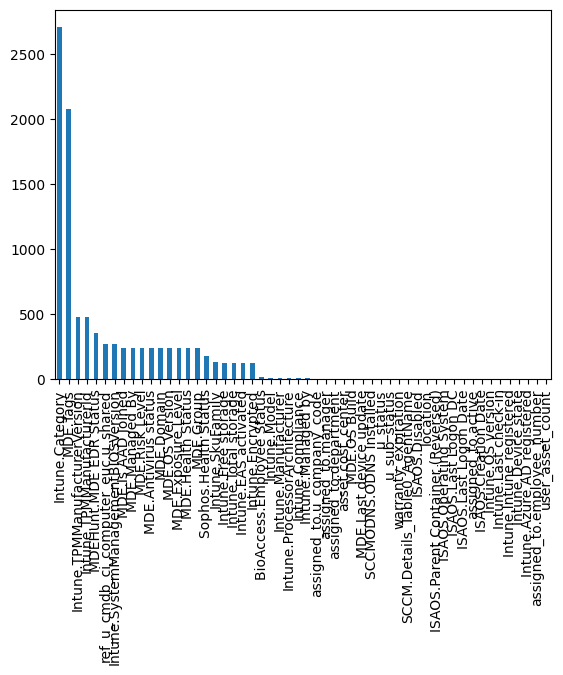

In [84]:
def s_count_notlisted(s:pd.Series):
    value_counts = s.value_counts()
    return value_counts.loc[value_counts.index == 'None Listed'].sum()

display(assets_df.apply(s_count_notlisted).sort_values(ascending=False)[:4])
assets_df.apply(s_count_notlisted).sort_values(ascending=False).plot.bar()